In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS


In [2]:
df = pd.read_csv('../transform/data/recruitment_ads.csv')
df.shape

(419, 16)

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,title,description,suburb,postcode,latitude,longitude,posting_date,price,extraction_date,state,recruitment_ad,legitimate,license_number
0,0,0,6.991657e+09,electrician and air conditioning for Ladies on...,35 YO fit male offering to repair or install h...,rochester,NaN,-36.3667,144.700,less than a week ago,NaN,2025-07-04,Victoria,True,True,O48463O769
1,1,1,7.071619e+09,"Wanted Electrician, Electrical Contractor. Bri...",We are a Telecommunications and Cabling Busine...,brisbane,4114.0,-27.6372,153.103,a week ago,NaN,2025-07-04,Queensland,True,True,NaN
2,2,2,6.982859e+09,"Saskia needs help! Gardener, Electrician, Mech...","I need help sorting out a backyard, getting po...",Marrara,812.0,-12.3970,130.891,a week ago,NaN,2025-07-04,NaN,True,True,NaN
3,3,3,7.417736e+09,"Tradies Wanted – Plumbers, Electricians, Handy...","Tradies WantedIn demand - Plumbers, Cleaners, ...",Bexley North,2207.0,-33.9500,151.117,less than a month ago,NaN,2025-07-04,New South Wales,True,True,NaN
4,4,4,6.874905e+09,gay electrician in Keysborough (nsfw),"Electrician for hire, happens to be gay (as we...",Keysborough,3173.0,-38.0167,145.167,less than a month ago,NaN,2025-07-04,Victoria,True,True,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     419 non-null    int64  
 1   Unnamed: 0       419 non-null    int64  
 2   id               419 non-null    float64
 3   title            419 non-null    object 
 4   description      419 non-null    object 
 5   suburb           419 non-null    object 
 6   postcode         7 non-null      float64
 7   latitude         419 non-null    float64
 8   longitude        419 non-null    float64
 9   posting_date     419 non-null    object 
 10  price            0 non-null      float64
 11  extraction_date  419 non-null    object 
 12  state            352 non-null    object 
 13  recruitment_ad   373 non-null    object 
 14  legitimate       373 non-null    object 
 15  license_number   237 non-null    object 
dtypes: float64(5), int64(2), object(9)
memory usage: 52.5+ KB


In [5]:
df.isna().sum()/len(df)

Unnamed: 0.1       0.000000
Unnamed: 0         0.000000
id                 0.000000
title              0.000000
description        0.000000
suburb             0.000000
postcode           0.983294
latitude           0.000000
longitude          0.000000
posting_date       0.000000
price              1.000000
extraction_date    0.000000
state              0.159905
recruitment_ad     0.109785
legitimate         0.109785
license_number     0.434368
dtype: float64

#### There are a lot of missing data. But description is available for all the jobs. For NLP task we can focus on description and title and probably no need to worry about other fields.
- The fields `postcode` and `price` are missing for a lot of observations and can be removed.
- LLM generated fields `recruitment_ad` and `license_number` are not really necessary.
- We can use `state`, `latitude` and `longitude` to have state wise analysis and to have aheatmap of job postings.
- `posting_date`,`extraction_date`, `id`(only for indexing) do not add any value in the ML analysis.

In [6]:
df_copy = df.copy()
unnecessary_columns = ['postcode','price','recruitment_ad','license_number','posting_date','extraction_date','id','suburb']
df_copy.drop(columns = unnecessary_columns, inplace = True)
df_copy.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'title', 'description', 'latitude',
       'longitude', 'state', 'legitimate'],
      dtype='object')

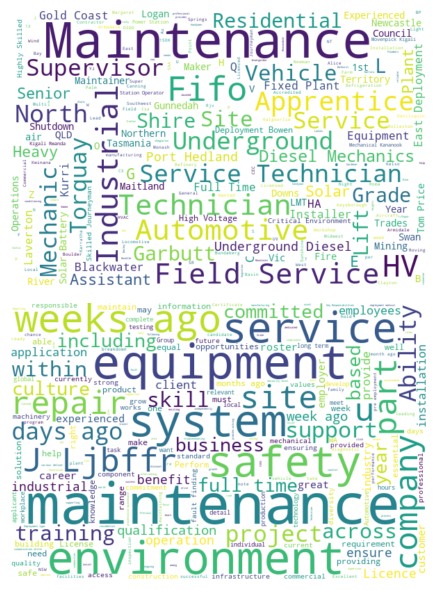

In [7]:
natural_language_cols = ['title', 'description',]
plt.figure(figsize = (8,6))
general_stopwords = set(STOPWORDS).union({
    "immediate", "available", "position", "required", "needed", "apply", "now",
    "vacancy", "opportunity", "seeking", "join", "team", "role", "work",
    "experience", "start", "today", "hire", "contact", "looking", "submit", "job",
    "trade",  "labour", "qualified", "ticketed",
     "full-time", "part-time", "pay", "rate",
    "hour", "weekly", "salary", "shift", "location", "metro", "regional",
    "white", "card", "locanto", "email", "phone", "number", "message", "call",
    "text", "mobile", "reply", "send", "please","electricians","australia",
    "western","south","auto","wales","electrician","victoria","melbourne","will","perth",
    "queensland","brisbane","new","city","electrical","Sydney","include","value","employee",
    "day","offer","people","working"
})
australian_places = {
    "sydney", "melbourne", "brisbane", "adelaide", "perth", "canberra", "hobart", "darwin",
    "townsville", "wagga", "mackay", "devonport", "cloncurry", "geraldton", "rockhampton",
    "mount", "orange", "coffs", "launceston", "geelong", "albany", "toowoomba",
    "queanbeyan", "ballarat", "bendigo", "broome", "burnie", "tamworth", "lismore", "bunbury"
}
final_stop_words = set(STOPWORDS).union(general_stopwords).union(australian_places)
description_stopwords = set(final_stop_words).union({ "certified", "licensed","contract", "temporary", "permanent","tradesman",})


for i,col in enumerate(natural_language_cols):
    text = " ".join(str(x) for x in df[col])
    plt.subplot(2,1,i+1)
    if col == 'description':
        wordcloud_image = WordCloud(width=600, height=400, stopwords=description_stopwords, background_color='white').generate(text)
    else:
        wordcloud_image = WordCloud(width=600, height=400, stopwords=final_stop_words, background_color='white').generate(text)
    plt.imshow(wordcloud_image, interpolation='bilinear')
    plt.axis('off')
plt.tight_layout()
plt.show()


#### The wordcloud suggests that most of the work is maintenance - as expected. In soft skills, probably committed.
Let's look at job postings by state and make a heatmap

In [8]:
df_copy = df_copy.dropna(subset=['latitude', 'longitude','state'])


In [9]:
from Project_1_web_scraping.helper_functions import build_heatmap

map_obj = build_heatmap(df_copy)
map_obj

As expected most of the electricians ads/job postings are from the main cities in Australia, with peaks in Brisbane,Perth,Sydney, Melbourne. Also there are some posts/ads in certain inner suburbs.


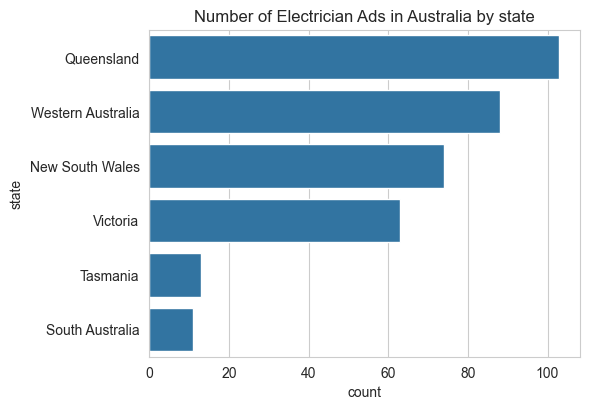

In [10]:
sns.set_style('whitegrid')
cols_to_plot = ["state",]
plt.figure(figsize = (6,4))
sns.countplot(data = df, y = "state", order = df_copy["state"].value_counts().index)
plt.tight_layout()
plt.title("Number of Electrician Ads in Australia by state")
plt.show()

#### The initial plan was to do TF-IDF + Random Forest on the data,which is obviously supervised learning. The target variable is generated by a small LLM on Ollama due to operational constraints. Let's have a look at the labels generated

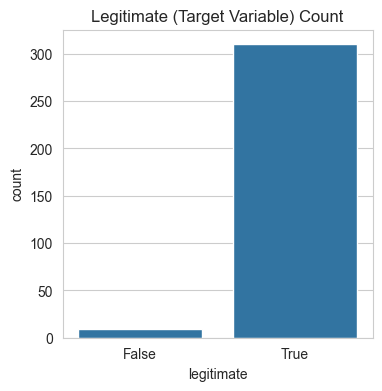

In [11]:
plt.figure(figsize = (4,4))
sns.countplot(x = df_copy.legitimate, data = df_copy,)
plt.title('Legitimate (Target Variable) Count')
plt.show()

The legitimate label is too imbalanced. Let's see how many

In [12]:
df_copy['legitimate'].value_counts()

legitimate
True     310
False      9
Name: count, dtype: int64

##### There are only 9 values that might indicate false job advertisements, which suggests that the dataset is currently insufficient for effective testing. To improve results, either the dataset needs to be expanded, or the prompt should be fine-tuned to extract relevant indicators of suspicious job ads.